## Exploratory Data Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
df=pd.read_csv('data/data.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [38]:
cat_columns=[cat for cat in df.columns if df[cat].dtype=='O']
num_columns=[num for num in df.columns if df[num].dtype!='O']
for c in cat_columns:
  print(c)
  print(df[c].unique())
  print(' ')
    

gender
['female' 'male']
 
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
 
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
lunch
['standard' 'free/reduced']
 
test preparation course
['none' 'completed']
 


In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [40]:
df['Total score']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total score']/3

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Average', ylabel='Count'>

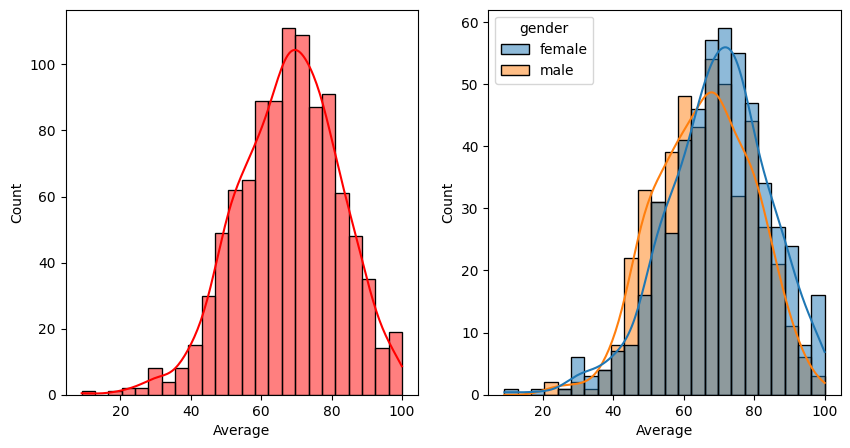

In [48]:
figure=plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df,x='Average',kde=True,color='red')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')

<Axes: title={'center': 'Male lunch'}, xlabel='Average', ylabel='Count'>

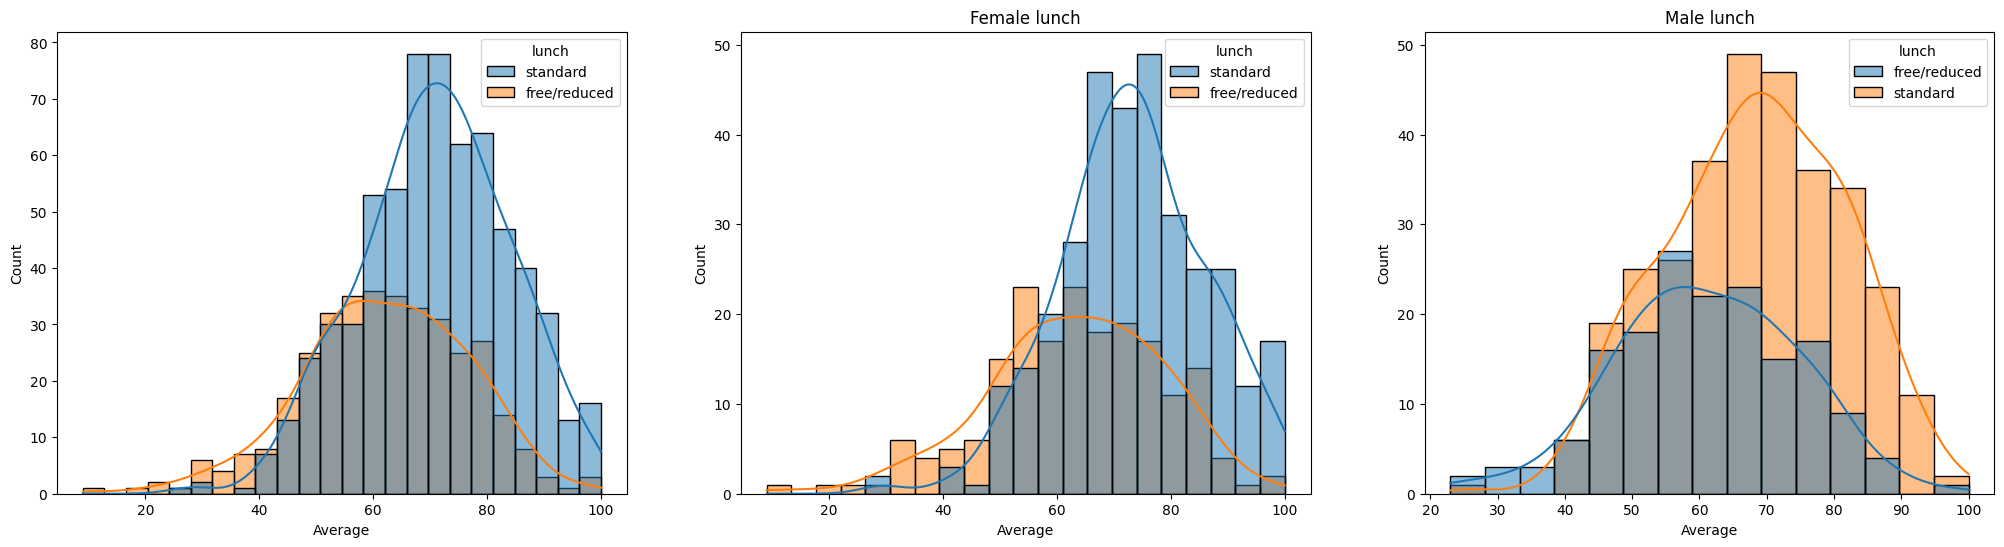

In [56]:
figure=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(132)
plt.title('Female lunch')
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(133)
plt.title('Male lunch')
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')